<a href="https://colab.research.google.com/github/aishv28/ML-LAB/blob/main/1BM22CS025_Lab_7_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris_data = pd.read_csv('iris.csv')

# Assuming the last column is the target and the rest are features
X = iris_data.iloc[:, :-1]  # Features
y = iris_data.iloc[:, -1]   # Target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train SVM classifiers with RBF and Linear kernels
svm_rbf = SVC(kernel='rbf')
svm_linear = SVC(kernel='linear')

# Fit models
svm_rbf.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

# Evaluate models
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Display results
print("RBF Kernel SVM:")
print(f"Accuracy: {accuracy_rbf}")
print(f"Confusion Matrix:\n{conf_matrix_rbf}\n")

print("Linear Kernel SVM:")
print(f"Accuracy: {accuracy_linear}")
print(f"Confusion Matrix:\n{conf_matrix_linear}")


RBF Kernel SVM:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Linear Kernel SVM:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy: 0.7375
Confusion Matrix:
[[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 49 104   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 30   0 103   0   0   0   1   0   0   0   2   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [ 43   0   0 113   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 90   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 42   0   0   0   0  97   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [ 71   0   0   0   0   0  87   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [105   0   0   2   0   0   0  33   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [ 21   0   0   0   0   0   0   0 122   0   0   0   0   0   0   0   0   0
    0   0   0   0  

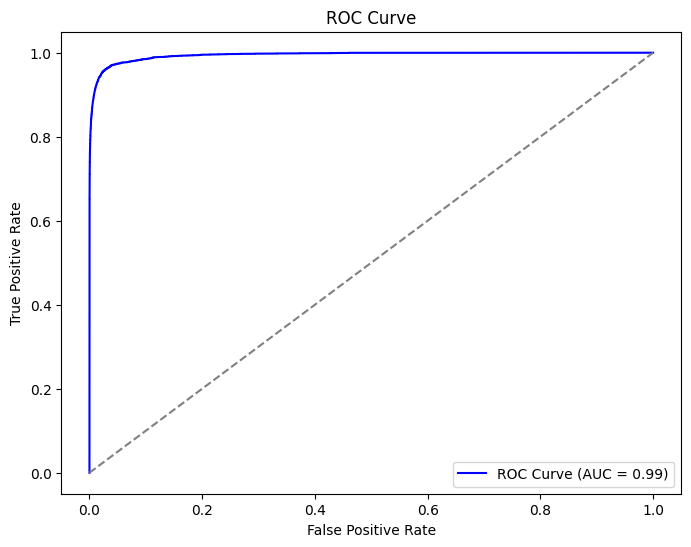

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Load the Letter Recognition dataset
letter_data = pd.read_csv('letter-recognition.csv')

# Features and target
X = letter_data.iloc[:, 1:]  # Features (excluding 'letter' column)
y = letter_data.iloc[:, 0]   # Target (letter)

# Encode target labels to binary format for ROC curve
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Define and train SVM classifier
svm = SVC(kernel='rbf', probability=True)
svm_classifier = OneVsRestClassifier(svm)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test.ravel(), svm_classifier.decision_function(X_test).ravel())
roc_auc = auc(fpr, tpr)

# Display results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"AUC Score: {roc_auc}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
